In [161]:
import pandas as pd
import numpy as np
import pyodbc as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('Data/publication_data.csv')

In [14]:
df.columns = ['cell_index', 'dendrite_index', 'spine_index', 'im_session', 'sipne_I', 'shape_1', 'shape_2', 'dist', 'x_CM', 'y_CM', 'x_den', 'y_den','z_den']

In [15]:
df

,cell_index,dendrite_index,spine_index,im_session,sipne_I,shape_1,shape_2,dist,x_CM,y_CM,x_den,y_den,z_den
0,1,1,2,1,5.1684,5.0923,3.8244,11.8220,174.25,140.180,174.00,152.000,0
1,1,1,3,1,14.6730,9.0718,6.6570,10.8530,198.24,146.150,198.00,157.000,0
2,1,1,4,1,42.8730,36.3070,7.9729,15.9230,209.63,148.300,207.00,164.000,0
3,1,1,5,1,19.5290,30.3960,5.9931,12.7200,389.14,271.000,397.00,261.000,-1
4,1,1,6,1,22.2130,10.3960,5.8750,13.8600,431.87,268.020,427.00,281.000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,8,3,21,6,12.4190,32.6290,7.1228,13.0520,634.56,-44.560,624.96,-53.409,1
8694,8,3,22,6,20.0780,18.0090,6.8475,11.3160,680.41,-140.050,669.96,-144.410,0
8695,8,3,23,6,69.9490,20.6580,10.7910,11.5630,696.46,-207.580,701.96,-197.410,3
8696,8,3,24,6,27.3440,37.1030,6.4089,17.9020,428.17,143.640,444.00,152.000,-2


In [16]:
index = np.where((df['cell_index'] == 1)  & (df['dendrite_index'] == 2)&(df['spine_index'] == 3))

In [17]:
df.iloc[index]

,cell_index,dendrite_index,spine_index,im_session,sipne_I,shape_1,shape_2,dist,x_CM,y_CM,x_den,y_den,z_den
254,1,2,3,1,52.941,24.040,8.4124,19.342,123.82,264.64,129.0,246.0,0
291,1,2,3,2,45.738,29.740,6.3713,18.787,123.62,180.67,130.0,163.0,0
322,1,2,3,3,48.386,30.227,9.5273,19.315,123.02,206.66,128.0,188.0,0
356,1,2,3,4,48.581,27.681,6.0950,19.945,125.17,217.94,125.0,198.0,1
384,1,2,3,5,46.755,21.898,5.6313,20.387,118.16,256.02,122.0,236.0,0
418,1,2,3,6,60.498,20.542,8.1421,20.092,120.55,188.66,128.0,170.0,0


In [18]:
index = np.where(df['im_session'] == 1)

In [19]:
df['shape_param'] = df.apply (lambda row: compute_shape(row), axis=1)

In [20]:
g = 0.37/df.iloc[index]['shape_param'].mean()

In [21]:
g

0.8339729203463223

In [22]:
def compute_shape(row):
    shape = (row['shape_1'] - row['shape_2'])/(row['shape_1'] + row['shape_2'])
    return shape

In [23]:
df[df['im_session'] == 1]

,cell_index,dendrite_index,spine_index,im_session,sipne_I,shape_1,shape_2,dist,x_CM,y_CM,x_den,y_den,z_den,shape_param
0,1,1,2,1,5.1684,5.0923,3.8244,11.8220,174.25,140.180,174.0,152.000,0,0.142194
1,1,1,3,1,14.6730,9.0718,6.6570,10.8530,198.24,146.150,198.0,157.000,0,0.153527
2,1,1,4,1,42.8730,36.3070,7.9729,15.9230,209.63,148.300,207.0,164.000,0,0.639886
3,1,1,5,1,19.5290,30.3960,5.9931,12.7200,389.14,271.000,397.0,261.000,-1,0.670610
4,1,1,6,1,22.2130,10.3960,5.8750,13.8600,431.87,268.020,427.0,281.000,-1,0.277856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,8,3,4,1,49.1660,7.1970,4.3537,4.1782,582.77,-72.825,586.4,-70.752,0,0.246158
8644,8,3,5,1,130.6000,19.3350,7.0464,3.9431,623.04,-121.450,624.4,-117.750,3,0.465805
8645,8,3,6,1,45.5510,49.9760,6.7408,9.7290,659.63,-123.570,651.4,-128.750,0,0.762300
8646,8,3,7,1,31.5510,12.7180,2.6921,2.3063,576.66,-17.217,574.4,-16.752,-1,0.650606


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A39855A250>]],
      dtype=object)

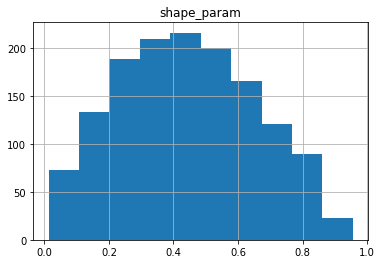

In [24]:
pd.DataFrame.hist(df.iloc[index], 'shape_param')

In [25]:
df

,cell_index,dendrite_index,spine_index,im_session,sipne_I,shape_1,shape_2,dist,x_CM,y_CM,x_den,y_den,z_den,shape_param
0,1,1,2,1,5.1684,5.0923,3.8244,11.8220,174.25,140.180,174.00,152.000,0,0.142194
1,1,1,3,1,14.6730,9.0718,6.6570,10.8530,198.24,146.150,198.00,157.000,0,0.153527
2,1,1,4,1,42.8730,36.3070,7.9729,15.9230,209.63,148.300,207.00,164.000,0,0.639886
3,1,1,5,1,19.5290,30.3960,5.9931,12.7200,389.14,271.000,397.00,261.000,-1,0.670610
4,1,1,6,1,22.2130,10.3960,5.8750,13.8600,431.87,268.020,427.00,281.000,-1,0.277856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,8,3,21,6,12.4190,32.6290,7.1228,13.0520,634.56,-44.560,624.96,-53.409,1,0.641636
8694,8,3,22,6,20.0780,18.0090,6.8475,11.3160,680.41,-140.050,669.96,-144.410,0,0.449037
8695,8,3,23,6,69.9490,20.6580,10.7910,11.5630,696.46,-207.580,701.96,-197.410,3,0.313746
8696,8,3,24,6,27.3440,37.1030,6.4089,17.9020,428.17,143.640,444.00,152.000,-2,0.705419


In [26]:
df.sort_values(['cell_index','dendrite_index','spine_index'])

,cell_index,dendrite_index,spine_index,im_session,sipne_I,shape_1,shape_2,dist,x_CM,y_CM,x_den,y_den,z_den,shape_param
43,1,1,1,2,8.4407,7.0416,4.5780,11.5540,25.805,191.550,26.00,180.000,0,0.212021
89,1,1,1,3,10.3030,8.7092,5.2331,12.5510,136.010,145.890,132.00,134.000,0,0.249320
128,1,1,1,4,14.5770,6.7284,5.2287,11.7280,128.320,174.250,125.00,163.000,0,0.125423
170,1,1,1,5,11.0400,5.1531,3.7635,10.1800,116.080,112.330,112.00,103.000,0,0.155844
217,1,1,1,6,16.5440,8.3010,5.5615,11.2140,107.720,168.650,102.00,159.000,0,0.197619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,8,3,21,6,12.4190,32.6290,7.1228,13.0520,634.560,-44.560,624.96,-53.409,1,0.641636
8694,8,3,22,6,20.0780,18.0090,6.8475,11.3160,680.410,-140.050,669.96,-144.410,0,0.449037
8695,8,3,23,6,69.9490,20.6580,10.7910,11.5630,696.460,-207.580,701.96,-197.410,3,0.313746
8696,8,3,24,6,27.3440,37.1030,6.4089,17.9020,428.170,143.640,444.00,152.000,-2,0.705419


In [158]:
test = df.groupby(['spine_index'])['cell_index'].reset_index(drop=True)

AttributeError: 'SeriesGroupBy' object has no attribute 'reset_index'

In [157]:
print(test)

In [167]:
df1 = df.groupby('spine_index,''cell_index', 'dendrite_index').apply(list).reset_index(name='new')

ValueError: No axis named dendrite_index for object type <class 'pandas.core.frame.DataFrame'>

In [148]:
print(test)

      spine_index  cell_index  dendrite_index  \
0               1           1               1   
1               1           1               2   
2               1           1               3   
3               1           1               4   
4               1           1               5   
...           ...         ...             ...   
3683          157           7               4   
3684          158           7               4   
3685          159           7               4   
3686          160           7               4   
3687          161           7               4   

                                                      0  
0     [cell_index, dendrite_index, spine_index, im_s...  
1     [cell_index, dendrite_index, spine_index, im_s...  
2     [cell_index, dendrite_index, spine_index, im_s...  
3     [cell_index, dendrite_index, spine_index, im_s...  
4     [cell_index, dendrite_index, spine_index, im_s...  
...                                                 ...  
3683 

In [29]:
firstspines=test.loc[test["im_session"]==1].reset_index()

In [30]:
print(firstspines)

      index  spine_index  cell_index  dendrite_index  im_session   sipne_I  \
0         1            1           1               2           1   17.1840   
1         2            1           1               3           1    5.8976   
2         3            1           1               4           1   71.7770   
3         4            1           1               5           1   63.2420   
4         5            1           1               7           1  170.1400   
...     ...          ...         ...             ...         ...       ...   
1414   3498          112           4               7           1   11.1400   
1415   3506          113           4               7           1   37.6290   
1416   3618          134           7               2           1   15.0210   
1417   3653          146           5               3           1    8.6201   
1418   3662          149           5               3           1   64.2900   

      shape_1  shape_2     dist     x_CM     y_CM    x_den   y_

In [132]:
nums = np.random.choice([0, 1], size=64, p=[.2, .8])
nums2=nums.reshape(8,8).astype(float)

In [164]:
for i in range(len(nums2)):
    for j in range (len(nums2[i])):
        if nums2[i][j]==1:
            print((i+1)*(j+1))
            nums2[i][j]=firstspines.iloc[(i+1)*(j+1),14*g]
print(nums2)

[[  226.      326.       66.      139.       25.677   354.3       0.
    382.44 ]
 [  326.      139.      354.3     382.44    266.      119.     -290.41
    307.   ]
 [   66.      354.3       0.      119.      430.      224.      439.
      0.   ]
 [  139.        0.      119.      307.    -1133.9       0.      296.
    585.4  ]
 [    0.      266.      430.    -1133.9     195.     1767.8      80.
    847.78 ]
 [  354.3     119.      224.        0.     1767.8     519.63    176.
    225.   ]
 [  596.04   -290.41    439.      296.        0.      176.      335.
    245.   ]
 [  382.44    307.      905.85    585.4     847.78    225.      245.
      0.   ]]


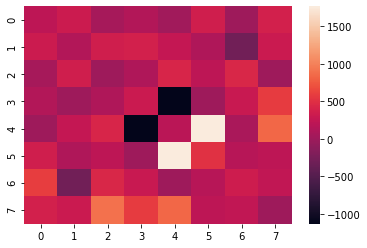

In [165]:
 plot=sns.heatmap(nums2)